<a href="https://colab.research.google.com/github/shsarv/ML-and-its-Application/blob/main/KNN%20on%20Iris%20Dataset/iris_Flower_Classifcation_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Iris Flower Classification using KNN</h1>

<hr>

### **Objective**

* The aim is to classify iris flowers among three species from measurements of sepals and petals' length and width.The central goal here is to design a model using **KNN Classifier** that makes useful classifications for new flowers or, in other words, one which exhibits good generalization.

* The iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

<hr>

**Submission by:-**

**Name -** Sarvesh Kumar Sharma

**Section -** A

**Class Roll no -** ***50***

**University Roll no -** ***181500625***



---



## Importing essential Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)


#### Loading Dataset

In [2]:
iris = datasets.load_iris()

##Converting to pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Series(iris.target)

In [3]:
# concise summary of a DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
# statistical details

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


2    50
1    50
0    50
Name: species, dtype: int64


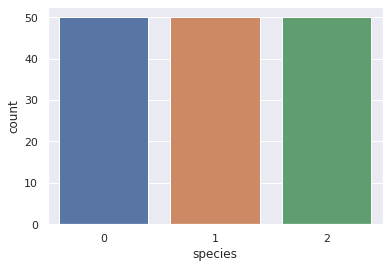

In [5]:
# Finding and visualizing number of Instances available for each target class.

print(df.species.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="species", data=df)

## Data Visuaization

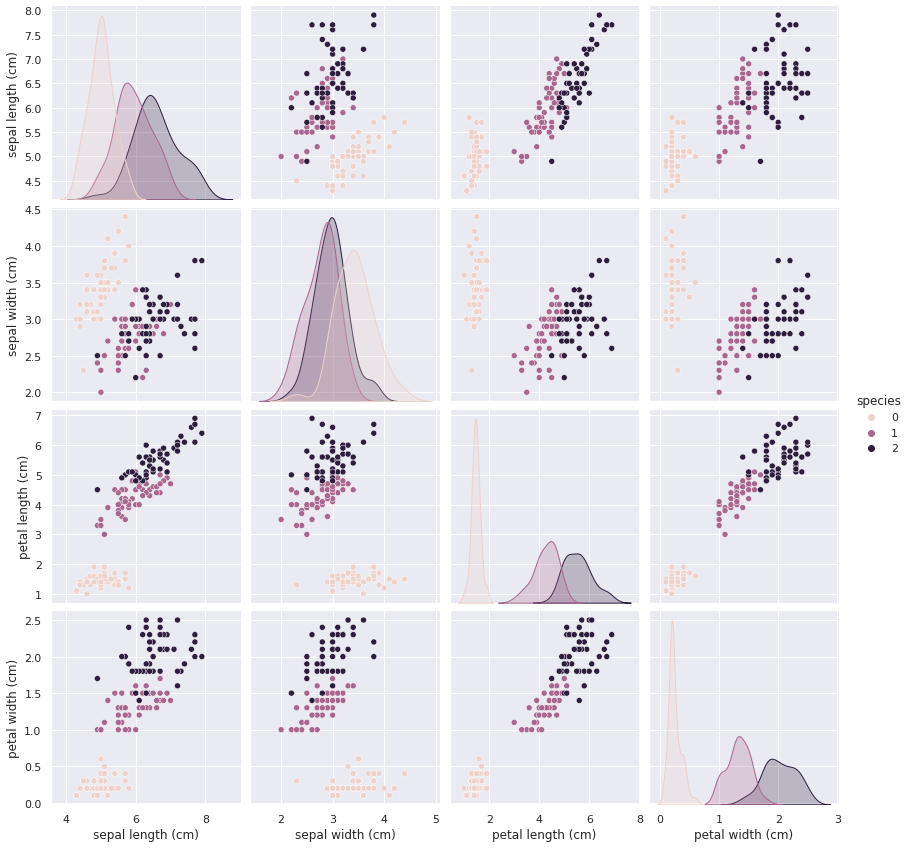

In [6]:
# Plotting pairwise relationships in a dataset.

sns.pairplot(df,hue="species",height=3,aspect=1)
plt.show()

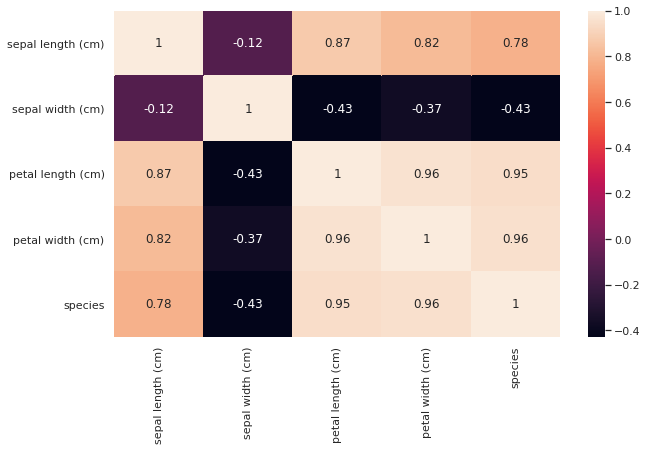

In [7]:
## heatmap to find correlation between attributes.

plt.figure(figsize=(10,6)) 
sns.heatmap(df.corr(),annot=True)
plt.show()

## Feature Scaling and Data Splitting

In [8]:
# removing target class from dataset

y=df['species']
X= df.drop('species',axis=1)

In [9]:
# Dataset splitting

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=10)

In [10]:
# Using Standard scaler for feature scaling

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## **KNN Classifier**

We will be using KNN CLassifier for this classification problem and will be using Euclidean distance to select nearest Neighbors. Euclidean distance is given by:-
<center><img src="https://www.i2tutorials.com/wp-content/media/2019/11/Euclidean-Distance-i2tutorials.png"></center>

**Self-Define function**
* We will develope our own function to create a KNN CLassfier.

**USING Sk-Learn Library**

* We will use KNeighborsClassifier from scikit-learn and will use gridSearch cv to find the best value of k.


## Self Defined Function



Shuffling the data, to avoid overFitting problem


In [11]:
shuffle_index = np.random.permutation(df.shape[0])
df = df.iloc[shuffle_index]
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
116,6.5,3.0,5.5,1.8,2
63,6.1,2.9,4.7,1.4,1
10,5.4,3.7,1.5,0.2,0
20,5.4,3.4,1.7,0.2,0
141,6.9,3.1,5.1,2.3,2


Splitting the dataset in to 70% for training and 30% for testing the model.

In [12]:
train_size = int(df.shape[0]*0.7)
train_df = df.iloc[:train_size,:] 
test_df = df.iloc[train_size:,:]
train = train_df.values
test = test_df.values
y_true = test[:,-1]

In [13]:
# Defining function to find Euclidean Distance

def euclidean_distance(x_test, x_train):
    distance = 0
    for i in range(len(x_test)-1):
        distance += (x_test[i]-x_train[i])**2
    return sqrt(distance)

In [14]:
# Defining function to find neighbors

def get_neighbors(x_test, x_train, num_neighbors):
    distances = []
    data = []
    for i in x_train:
        distances.append(euclidean_distance(x_test,i))
        data.append(i)
    distances = np.array(distances)
    data = np.array(data)
    sort_indexes = distances.argsort()             #argsort() function returns indices by sorting distances data in ascending order
    data = data[sort_indexes]                      #modifying our data based on sorted indices, so that we can get the nearest neightbours
    return data[:num_neighbors]               

In [15]:
# Function working as a model to predict.

def prediction(x_test, x_train, num_neighbors):
    classes = []
    neighbors = get_neighbors(x_test, x_train, num_neighbors)
    for i in neighbors:
        classes.append(i[-1])
    predicted = max(classes, key=classes.count)              #taking the most repeated class
    return predicted

In [16]:
# Function to find Accuracy pf model

def accuracy(y_true, y_pred):
    num_correct = 0
    for i in range(len(y_true)):
        if y_true[i]==y_pred[i]:
            num_correct+=1
    accuracy = num_correct/len(y_true)
    return accuracy

### Evaluation

In [17]:
y_pred = []
for i in test:
    y_pred.append(prediction(i, train, 10))
y_pred

[2.0,
 2.0,
 1.0,
 0.0,
 2.0,
 1.0,
 0.0,
 1.0,
 0.0,
 2.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 2.0,
 2.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 0.0,
 1.0,
 2.0,
 2.0,
 0.0,
 0.0,
 1.0,
 0.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.0,
 1.0]

**********************************************************************
Accuracy of the model is :  0.9555555555555556
RMSE value = 0.21
R2 Score= 0.94
**********************************************************************
Confusion matrix of classifier : 
 [[15  0  0]
 [ 0 13  0]
 [ 0  2 15]]


**********************************************************************
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.88      0.94        17

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

**********************************************************************


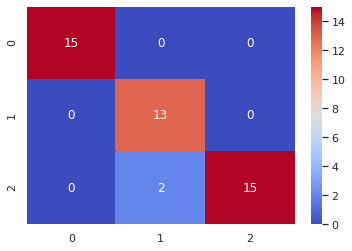

In [18]:
acc = accuracy(y_true, y_pred)
print("*******"*10)
print("Accuracy of the model is : ",acc)
rmse = sqrt(mean_squared_error(y_true, y_pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_true, y_pred))
print("*******"*10)
# Confusion Matrix

cm=confusion_matrix(y_true, y_pred)
print("Confusion matrix of classifier : \n",cm)
print("\n")
sns.heatmap(cm, annot=True,cmap ='coolwarm')
print("*******"*10)
# Classification report of our model.

t=["Iris-setosa","Iris-versicolor","Iris-virginica"]
print(classification_report(y_true, y_pred,target_names=t))
print("*******"*10)

We got Test **Accuracy of 95.56%** by defining our function. It shows our model is working well good on this dataset.

## Using SKLearn Library

In [19]:
knn_clf = KNeighborsClassifier()
param_grid = {'n_neighbors' : [1,2,3,4,5,7,8,9,10,11,12]}
grid_search = GridSearchCV (knn_clf, param_grid, cv=kFold,scoring = 'recall_weighted', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall_weighted', verbose=0)

In [20]:
grid_search.best_params_
#grid_search.best_score_

{'n_neighbors': 11}

In [21]:
knnclassifier = KNeighborsClassifier(n_neighbors=11)
knnclassifier.fit(X_train, y_train)
y_pred = knnclassifier.predict(X_test)

### Evaluation

In [22]:
knn_train_accuracy = accuracy_score(y_train, knnclassifier.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knnclassifier.predict(X_test))

Confusion matrix of classifier : 
 [[14  0  0]
 [ 0 16  1]
 [ 0  0 14]]




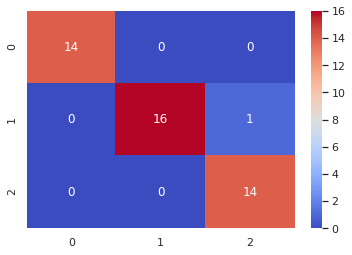

In [23]:
# Confusion Matrix

cm=confusion_matrix(y_test, y_pred)
print("Confusion matrix of classifier : \n",cm)
print("\n")
sns.heatmap(cm, annot=True,cmap ='coolwarm')

In [24]:
# Classification report of our model.

t=["Iris-setosa","Iris-versicolor","Iris-virginica"]
print(classification_report(y_test, y_pred,target_names=t))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [25]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y_test, y_pred))
#print('Train Accuracy score:',knn_train_accuracy)
print('Test Accuracy score: ',knn_test_accuracy)

RMSE value = 0.15
R2 Score= 0.96
Test Accuracy score:  0.9777777777777777


We got test **Accuracy of 97.78%** on the iris Dataset using sklearn library using KNN Classifier with number of neighbors=11.


Thank you



